In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Copy of bankruptcy-prevention.csv to Copy of bankruptcy-prevention.csv


In [7]:
df = pd.read_csv("Copy of bankruptcy-prevention.csv", delimiter=';')

In [18]:
df.columns = df.columns.str.strip()

In [4]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (250, 1)

Data Types:
 industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class    object
dtype: object

Missing Values:
 industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class    0
dtype: int64


In [5]:
df.rename(columns={' class': 'class'}, inplace=True)

In [19]:
print("\nClass distribution:\n", df['class'].value_counts())


Class distribution:
 class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64


In [15]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
        industrial_risk   management_risk   financial_flexibility  \
count       250.000000        250.000000              250.000000   
mean          0.518000          0.614000                0.376000   
std           0.411526          0.410705                0.401583   
min           0.000000          0.000000                0.000000   
25%           0.000000          0.500000                0.000000   
50%           0.500000          0.500000                0.500000   
75%           1.000000          1.000000                0.500000   
max           1.000000          1.000000                1.000000   

        credibility   competitiveness   operating_risk  
count    250.000000        250.000000       250.000000  
mean       0.470000          0.476000         0.570000  
std        0.415682          0.440682         0.434575  
min        0.000000          0.000000         0.000000  
25%        0.000000          0.000000         0.000000  
50%        0.500000   

In [16]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 147


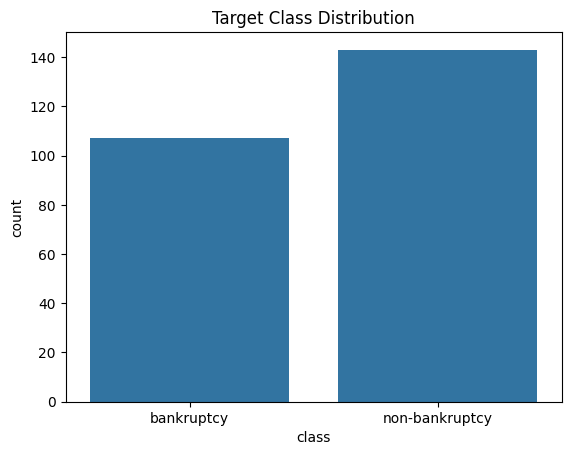

In [20]:
sns.countplot(x='class', data=df)
plt.title("Target Class Distribution")
plt.show()

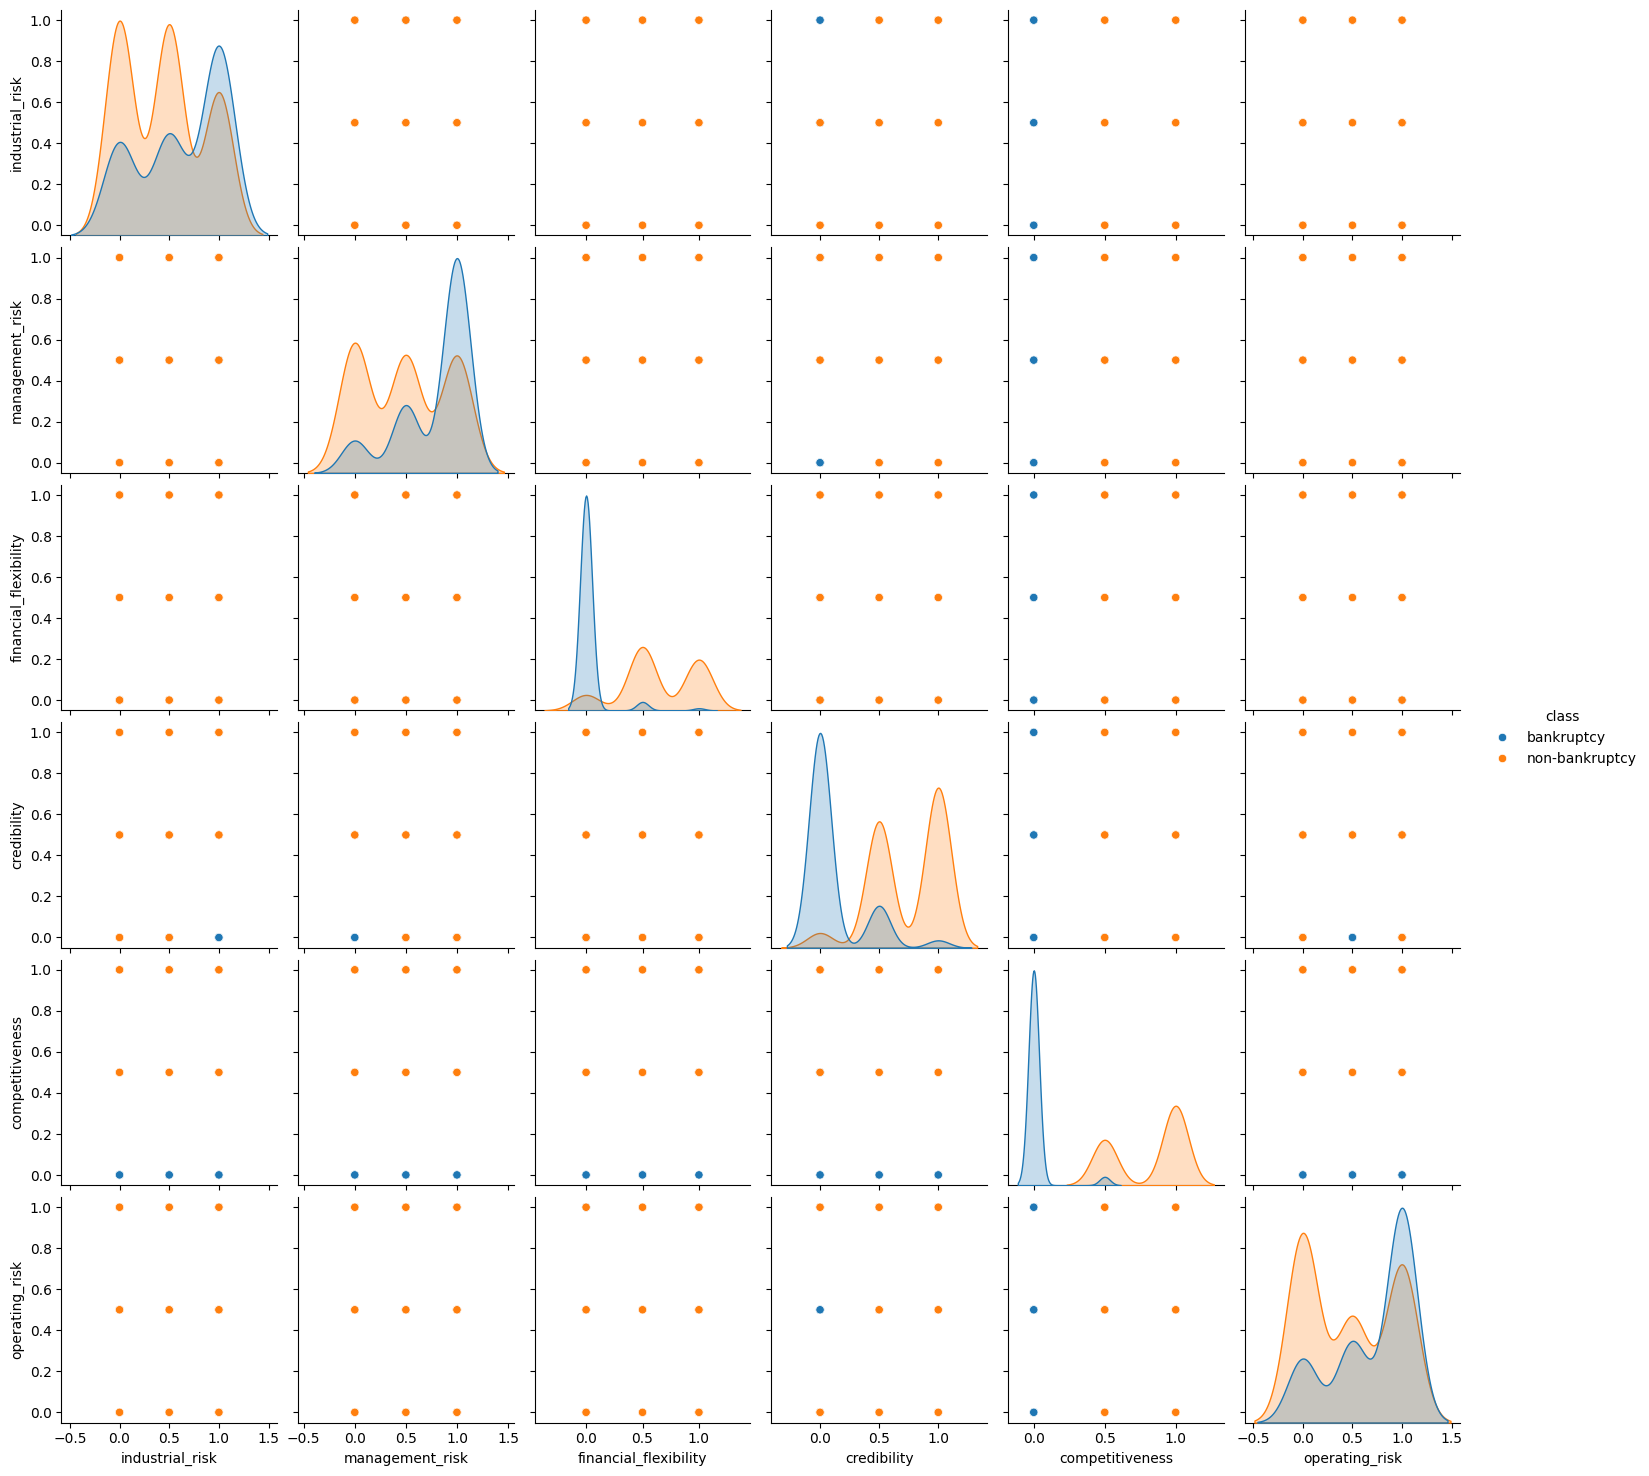

In [21]:
sns.pairplot(df, hue='class')
plt.show()

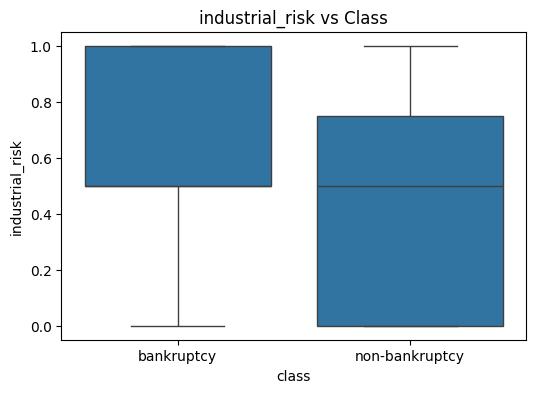

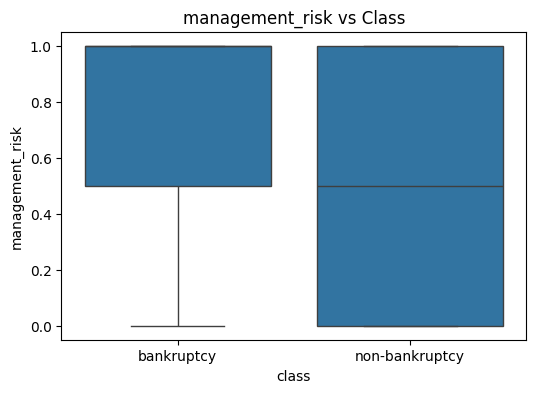

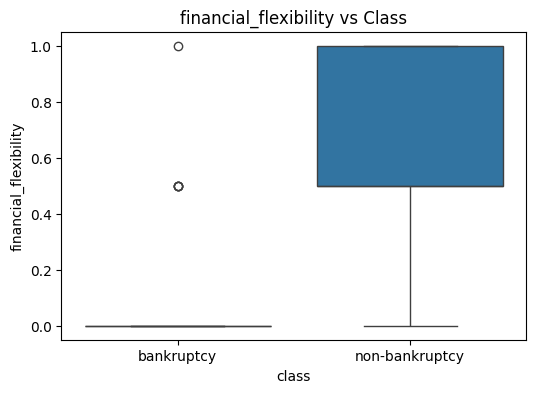

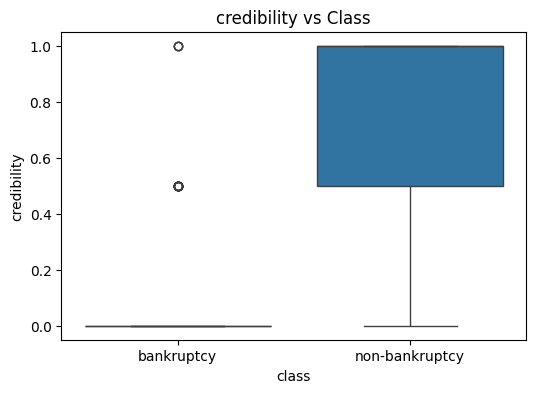

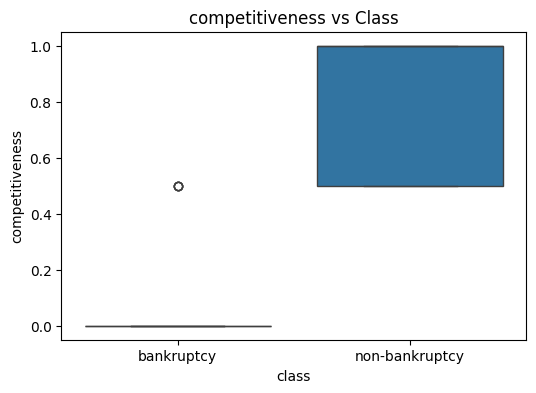

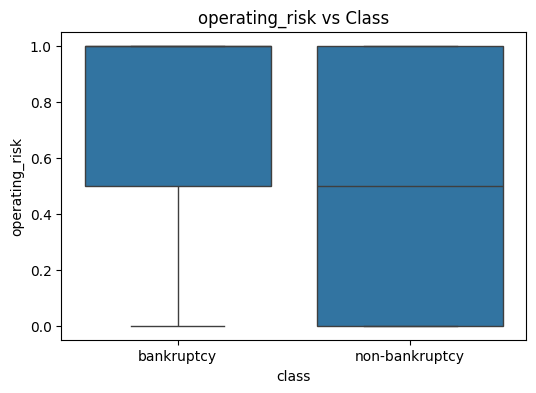

In [22]:
for col in df.columns[:-1]:  # Skip target
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f"{col} vs Class")
    plt.show()

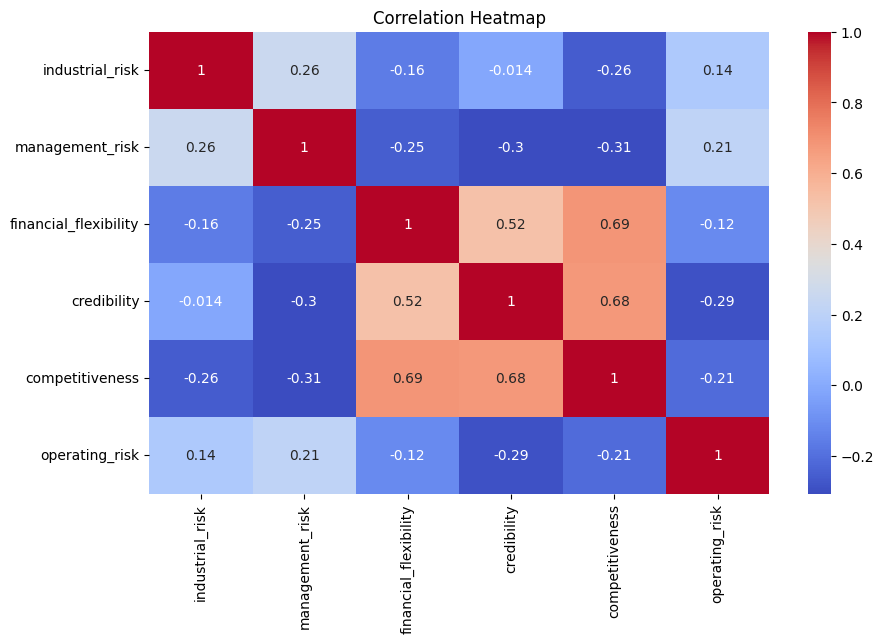

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('class', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [24]:
df['class'] = df['class'].map({'non-bankruptcy': 0, 'bankruptcy': 1})

In [25]:
print("\nFinal Processed Data:\n", df.head())


Final Processed Data:
    industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk  class  
0              0.0             0.5      1  
1              0.0             1.0      1  
2              0.0             1.0      1  
3              0.0             1.0      1  
4              0.0             1.0      1  
